# Algotytm przecinania się odcinków na płaszczyźnie

In [2]:
import sys
sys.path.insert(0, '../')


import numpy as np
import pandas as pd
from tests.test4 import Test
from visualizer.main import Visualizer
from sortedcontainers import SortedSet
from sortedcontainers import SortedDict
import matplotlib.pyplot as plt
import random


# Przydatne funkcje 

In [2]:

def draw_lines(section):
    '''
    Prosta funkcja która wyświetla odcinki
    za pomocą funkcji przygotowanych przez KN BiT
    Jako argumenty przyjmuje listę w której elementem jest
    ((x1,y1),(x2,y2)) gdzie piewsza krotka (x1,y1) są to współrzędne
    punktu rozpoczynającego prostą. Analogicznie (x2,y2) to współrzędne końca.
    '''
    vis=Visualizer()
    point_for_vis = []
    for pair in section:
        point_for_vis.extend(pair)

    vis.add_line_segment(point_for_vis,color='purple')
    vis.show()



def draw_w_intersections(inters,section):
    '''
    Funkcja przyjmuje jaka argumenty liste inters której elementem jest krotka (p,i,j), p=(x,y)
    zawierająca współrzędne punktu p przecięcia prostych i,j. Funkcja przyjmuje również liste section
    która jest identyczna jak w powyższej funkcji draw_lines.
    '''
    vis=Visualizer()
    section_lines=[]
    intersection_points =[]
    for (p,s1,s2) in inters:
        intersection_points.append(p)
    for pair in section:
        section_lines.extend(pair)
    vis.add_point(intersection_points,color = 'red')
    vis.add_line_segment(section_lines,color='green')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [3]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów.
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """


    '''
    generuje n losowych odcinków które mają parami
    różne współrzędne x oraz nie są pionowe
    '''
    taken_x_ends=set()
    sections = []
    for i in range (n):
        x1=np.random.uniform(0,max_x)
        x2=np.random.uniform(0,max_x)
        y1=np.random.uniform(0,max_y)
        y2=np.random.uniform(0,max_y)

        while(x1 in taken_x_ends):
            x1=np.random.uniform(0,max_x)

        point1= (x1,y1)
        taken_x_ends.add(x1)


        while(x2 in taken_x_ends):
            x2=np.random.uniform(0,max_x)

        point2=(x2,y2)
        taken_x_ends.add(x2)

        if(x1<x2):
            sections.append((point1,point2))
        else:
            sections.append((point2,point1))
    return sections


In [65]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.084s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [67]:
section=generate_uniform_sections(1000,1000,20)
draw_lines(section)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [6]:
%matplotlib tk
import matplotlib.pyplot as plt

def add_sections():

    mouse_sections = []
    taken_x_ends = set()
    active = True
    current_points = []

    # Funkcja rysuje punkt po kliknięciu użytkownika
    def draw_point(point):
        ax.scatter(point[0], point[1], color="orange")
        fig.canvas.draw()

    # Funkcja rysuje odcinek powstały z dwóch punktów
    def draw_line(pointa, pointb):
        x = [pointa[0], pointb[0]]
        y = [pointa[1], pointb[1]]
        ax.plot(x, y, color="purple")
        fig.canvas.draw()

    # Obsługa zdarzenia kliknięcia myszą
    def onclick(event):
        nonlocal active, current_points

        if active:
            if event.button == 1:  # Lewy przycisk myszy
                x = event.xdata
                y = event.ydata

                if x is None or y is None:
                    return  # Ignoruj kliknięcia poza wykresem

                if x in taken_x_ends:
                    ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać! Podaj nowy punkt")
                    fig.canvas.draw()
                else:
                    taken_x_ends.add(x)
                    current_points.append((x, y))
                    draw_point((x, y))

                    if len(current_points) == 2:
                        # Rysowanie odcinka
                        draw_line(current_points[0], current_points[1])

                        # Dodanie odcinka do listy
                        if current_points[0][0] < current_points[1][0]:
                            mouse_sections.append((current_points[0], current_points[1]))
                        else:
                            mouse_sections.append((current_points[1], current_points[0]))

                        # Wyczyszczenie punktów dla kolejnego odcinka
                        current_points = []

            elif event.button == 3:  # Prawy przycisk myszy
                if len(mouse_sections) < 2:
                    ax.set_title("Aby miało to sens muszą być co najmniej 2 odcinki!")
                    fig.canvas.draw()
                else:
                    active = False
                    ax.set_title("Dziękuję! Okno zamyka się.")
                    fig.canvas.draw()
                    plt.pause(2)
                    plt.close(fig)

    # Tworzenie figury i osi
    fig, ax = plt.subplots()
    plt.get_current_fig_manager().set_window_title("Wygeneruj własny zbiór odcinków!")
    ax.set_title("Kliknij lewym przyciskiem, aby dodać punkt.\n"
                 "Każda kolejna para punktów stworzy odcinek.\n"
                 "Aby zakończyć, kliknij prawym przyciskiem.")
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_aspect(1)
    plt.tight_layout()

    fig.canvas.mpl_connect("button_press_event", onclick)

    plt.ion()
    plt.show()
    plt.pause(0.1)

    return mouse_sections


# Implementacja niezbędnych struktur oraz funkcji pomocniczych


# Funkcja sprawdzająca czy występuje jakiekolwiek przecięcie

In [8]:

def is_intersection(sections):
    n = len(sections)
    Q = SortedSet(key=lambda x: x[0])  # Struktura zdarzeń
    class_sections = []

    '''
    Tworzenie class_sections zawierającej odncinki reprezentowane
    za pomocą klasy Sections i wypełnianie struktury zdarzeń
    '''
    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        l = Point(x1, y1)
        r = Point(x2, y2)
        class_sections.append(Section(l, r))
        Q.add((l, i, None, "s"))  # Początek odcinka
        Q.add((r, i, None, "e"))  # Koniec odcinka


    # Struktura stanu
    T = ExtendedSortedDict()

    while Q:
        point = Q.pop(0)  # Pobierz pierwszy element ze struktury stanu

        if point[3] == "s":  # Początek odcinka
            Section.update_x(point[0].x)  # Aktualizacja x dla komperatora struktury stanu

            T[class_sections[point[1]]] = point[1]
            left, right = T.get_neighbour(class_sections[point[1]])
            if left is not None and are_intersecting(class_sections[point[1]], class_sections[left]):
                return True
            if right is not None and are_intersecting(class_sections[point[1]], class_sections[right]):
                return True

        elif point[3] == "e":  # Koniec odcinka
            left, right = T.get_neighbour(class_sections[point[1]])
            if left is not None and right is not None and are_intersecting(class_sections[left], class_sections[right]):
                return True
            T.pop(class_sections[point[1]])


    return False


In [68]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.002s


/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None
/tmp/ipykernel_61562/1222203155.py:61: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  prev_key = self[self.iloc[index - 1]] if index > 0 else None


# Funkcja znajdująca wszyskie przecięcia

In [10]:
def find_intersections(sections):
    n = len(sections)
    Q = SortedSet(key=lambda x: x[0])  # Struktura zdarzeń
    class_sections = []
    result = {}

    '''
    Tworzenie class_sections zawierającej odncinki reprezentowane
    za pomocą klasy Sections i wypełnianie struktury zdarzeń
    '''
    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        l = Point(x1, y1)
        r = Point(x2, y2)
        class_sections.append(Section(l, r))
        Q.add((l, i, None, "s"))  # Początek odcinka
        Q.add((r, i, None, "e"))  # Koniec odcinka

    def add_inter(i, j):
        if i > j:
            i, j = j, i
        p = crossing_point(class_sections[i], class_sections[j])
        if (i, j) not in result:
            p_class = Point(p[0], p[1])
            Q.add((p_class, i, j, "c"))  # Punkt przecięcia dodawany do struktury zdarzeń
            result[(i, j)] = (p, i, j)

    # Struktura stanu
    T = ExtendedSortedDict()

    while Q:
        point = Q.pop(0)  # Pobierz pierwszy element ze struktury stanu

        if point[3] == "s":  # Początek odcinka
            Section.update_x(point[0].x)  # Aktualizacja x dla komperatora struktury stanu

            T[class_sections[point[1]]] = point[1]
            left, right = T.get_neighbour(class_sections[point[1]])
            if left is not None and are_intersecting(class_sections[point[1]], class_sections[left]):
                add_inter(point[1], left)
            if right is not None and are_intersecting(class_sections[point[1]], class_sections[right]):
                add_inter(point[1], right)

        elif point[3] == "e":  # Koniec odcinka
            left, right = T.get_neighbour(class_sections[point[1]])
            if left is not None and right is not None and are_intersecting(class_sections[left], class_sections[right]):
                add_inter(left, right)
            T.pop(class_sections[point[1]])

        elif point[3] == "c":  # Punkt przecięcia
            i = point[1]
            j = point[2]
            if class_sections[i].L.y > class_sections[j].L.y:
                i, j = j, i

            x, y = crossing_point(class_sections[i], class_sections[j])

            T.pop(class_sections[i])
            T.pop(class_sections[j])
            Section.update_x(x + delta)  # Aktualizacja X

            T[class_sections[i]] = i
            T[class_sections[j]] = j

            gi = T.get_larger(class_sections[i])
            dj = T.get_smaller(class_sections[j])
            if gi is not None and are_intersecting(class_sections[i], class_sections[gi]):
                add_inter(i, gi)
            if dj is not None and are_intersecting(class_sections[j], class_sections[dj]):
                add_inter(j, dj)

    return list(result.values())


Narysuj własne odcinki oraz wygeneruj punkty przecięcia

In [30]:
section3=add_sections()


In [37]:
res=find_intersections(section3)

/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None


In [39]:
draw_w_intersections(res,section3)


In [45]:


sections_A=[(( 0.15151888594491358 , 0.2011830673485735 ),( 0.567441000677799 , 1.9646928338160083 )),
(( 0.3234333600345063 , 0.18454618275925805 ),( 0.7837205003388996 , 1.9425103210302546 )),
(( 0.5341672314991683 , 0.20672869554501194 ),( 0.9944543718035614 , 1.9092365518516237 )),
(( 0.03506069381970556 , 1.643046398422577 ),( 1.9649393061802942 , 1.8870540390658699 )),
(( 0.007332552837513218 , 1.515496949904492 ),( 1.903937396019471 , 1.6707745394047693 )),
(( 0.01842380923039022 , 1.4323125269579149 ),( 1.8262986012693325 , 1.4101300141721609 )),
(( 1.6266559861975476 , 1.2881261938505144 ),( 1.7597510629120707 , 0.3342781440630969 )),
(( 1.083184422946577 , 1.0552098096000986 ),( 1.7763879475013864 , 1.1328486043502373 )),
(( 1.3050095508041162 , 0.944297245671329 ),( 1.3826483455542546 , 0.7890196561710519 )),
(( 1.7542054347156322 , 1.04966418140366 ),( 1.7708423193049478 , 0.8777497073140674 )),
(( 1.1940969868753466 , 0.8555671945283134 ),( 1.8595723704479634 , 0.966479758457083 )),
(( 0.8391767823032843 , 0.22891120833076584 ),( 1.2661901534290467 , 0.2178199519378889 )),
(( 1.1663688458931543 , 0.20672869554501194 ),( 1.1774601022860312 , 0.43964507979542783 )),
(( 0.8502680386961612 , 0.39528005422392004 ),( 1.2329163842504158 , 0.3897344260274816 )),
(( 0.9500893462320537 , 0.5061926181526897 ),( 1.0277281409821923 , 0.1790005545628196 )),
(( 0.06278883480189801 , 0.9054778482962598 ),( 0.9389980898391768 , 0.6725614640458437 )),
(( 0.17370139873066748 , 1.1605767453324296 ),( 0.2790683344629985 , 0.43964507979542783 )),
(( 0.4731653213383451 , 0.41746256700967393 ),( 0.9722718590178077 , 0.8888409637069443 ))]

sections_B=[(( 0.4177090393739602 , 1.6541376548154538 ),( 1.5601084478402858 , 0.4562819643847433 )),
(( 0.3567071292131372 , 0.4562819643847433 ),( 1.5989278452153552 , 1.6985026803869616 )),
(( 0.4288002957668373 , 1.0274816686179062 ),( 0.46761969314190655 , 1.0219360404214677 )),
(( 0.5452584878920452 , 1.04966418140366 ),( 0.6783535646065686 , 1.04966418140366 )),
(( 1.105366935732331 , 1.1106660915644833 ),( 1.244007640643293 , 1.04966418140366 )),
(( 1.3438289481791852 , 0.9609341302606444 ),( 1.5101977940723397 , 1.1827592581181834 ))]

sections_C=[(( 0.12379074496272113 , 1.8038696161192924 ),( 1.410376486536447 , 1.9203278082445008 )),
(( 0.38998089839176786 , 1.399038757779284 ),( 0.9500893462320537 , 1.071846694189414 )),
(( 0.6672623082136915 , 1.5321338344938074 ),( 1.3549202045720623 , 1.5986813728510691 )),
(( 0.8059030131246534 , 1.365764988600653 ),( 1.2994639226076776 , 0.8999322200998212 )),
(( 0.4731653213383451 , 0.6614702076529668 ),( 0.9889087436071231 , 0.9387516174748907 )),
(( 0.5563497442849221 , 0.2677306057058352 ),( 1.1552775895002774 , 0.5061926181526897 )),
(( 1.6599297553761785 , 0.3675519132417277 ),( 1.7985704602871402 , 1.7095939367798385 )),
(( 1.2550988970361696 , 1.3269455912255839 ),( 1.6044734734117938 , 1.260398052868322 ))]

sections_D=[(( 0.10160823217696735 , 1.515496949904492 ),( 1.6155647298046705 , 0.10690738800911942 )),
(( 0.42325466757039876 , 1.9536015774231312 ),( 1.2994639226076776 , 0.9997535276357139 )),
(( 0.8447224104997226 , 1.071846694189414 ),( 1.9094830242159095 , 1.8260521289050466 ))]


sections_E=[(( 0.9667262308213691 , 0.10690738800911942 ),( 1.9704849343767328 , 1.3103087066362684 )),
(( 0.040606322016144114 , 1.387947501386407 ),( 1.138640704910962 , 0.11799864440199637 )),
(( 0.023969437426828666 , 1.2770349374576375 ),( 0.45652843674902965 , 1.936964692833816 )),
(( 1.5157434222687782 , 1.925873436440939 ),( 1.9760305625731713 , 1.2049417709039374 )),
(( 1.338283319982747 , 1.8593258980836775 ),( 1.6432928707868628 , 1.8593258980836775 )),
(( 1.0221825127857538 , 1.365764988600653 ),( 1.4159221147328855 , 1.9147821800480622 )),
(( 0.6783535646065686 , 1.9536015774231312 ),( 1.1109125639287694 , 1.387947501386407 )),
(( 0.35116150101669863 , 1.903690923655185 ),( 0.789266128535338 , 1.8815084108694313 ))]


In [69]:
draw_lines(sections_A)
draw_lines(sections_B)
draw_lines(sections_C)
draw_lines(sections_D)
draw_lines(sections_E)


In [70]:
intersections_A=find_intersections(sections_A)
intersections_B=find_intersections(sections_B)
intersections_C=find_intersections(sections_C)
intersections_D=find_intersections(sections_D)
intersections_E=find_intersections(sections_E)


draw_w_intersections(intersections_A,sections_A)
draw_w_intersections(intersections_B,sections_B)
draw_w_intersections(intersections_C,sections_C)
draw_w_intersections(intersections_D,sections_D)
draw_w_intersections(intersections_E,sections_E)

print(len(intersections_A))
print(len(intersections_B))
print(len(intersections_C))
print(len(intersections_D))
print(len(intersections_E))

24
1
0
1
8


/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None
/tmp/ipykernel_61562/1222203155.py:61: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  prev_key = self[self.iloc[index - 1]] if index > 0 else None


In [17]:
randomsect=generate_uniform_sections(1000,1000,10)

randomsect_res=find_intersections(randomsect)


/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None


In [18]:
draw_w_intersections(randomsect_res,randomsect)

In [71]:
Test().runtest(3, find_intersections)


Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.002s


/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None
/tmp/ipykernel_61562/1222203155.py:61: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  prev_key = self[self.iloc[index - 1]] if index > 0 else None


Uzupełnij funkcję ```find_intersections_with_visualization```

In [72]:
def find_intersections_with_visualization(sections):
    n = len(sections)
    Q = SortedSet(key=lambda x: x[0])  # Struktura zdarzeń
    class_sections = []
    result = {}
    points=[]
    vis=Visualizer()
    '''
    Tworzenie class_sections zawierającej odncinki reprezentowane
    za pomocą klasy Sections i wypełnianie struktury zdarzeń
    '''
    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        l = Point(x1, y1)
        r = Point(x2, y2)
        class_sections.append(Section(l, r))
        Q.add((l, i, None, "s"))  # Początek odcinka
        Q.add((r, i, None, "e"))  # Koniec odcinka

    for i in range(n):
        points.append(sections[i][0])
        points.append(sections[i][1])
    vis.add_line_segment(points, color="yellow")

    def add_inter(i, j):
        if i > j:
            i, j = j, i
        p = crossing_point(class_sections[i], class_sections[j])
        if (i, j) not in result:
            p_class = Point(p[0], p[1])
            Q.add((p_class, i, j, "c"))  # Punkt przecięcia dodawany do struktury zdarzeń
            result[(i, j)] = (p, i, j)
            vis.add_point(p, color="red")

    # Struktura stanu
    T = ExtendedSortedDict()

    while Q:
        point = Q.pop(0)  # Pobierz pierwszy element ze struktury stanu
        sweep_vis=vis.add_line([(point[0].x,0),(point[0].x,1)], color="red")
        if point[3] == "s":  # Początek odcinka
            Section.update_x(point[0].x)  # Aktualizacja x dla komperatora struktury stanu
            vis.add_line_segment(sections[point[1]],color="green")

            T[class_sections[point[1]]] = point[1]
            left, right = T.get_neighbour(class_sections[point[1]])
            if left is not None and are_intersecting(class_sections[point[1]], class_sections[left]):
                add_inter(point[1], left)
            if right is not None and are_intersecting(class_sections[point[1]], class_sections[right]):
                add_inter(point[1], right)

        elif point[3] == "e":  # Koniec odcinka
            left, right = T.get_neighbour(class_sections[point[1]])
            vis.add_line_segment(sections[point[1]],color="black")

            if left is not None and right is not None and are_intersecting(class_sections[left], class_sections[right]):
                add_inter(left, right)
            T.pop(class_sections[point[1]])

        elif point[3] == "c":  # Punkt przecięcia
            i = point[1]
            j = point[2]
            if class_sections[i].L.y > class_sections[j].L.y:
                i, j = j, i

            x, y = crossing_point(class_sections[i], class_sections[j])

            T.pop(class_sections[i])
            T.pop(class_sections[j])
            Section.update_x(x + delta)  # Aktualizacja X

            T[class_sections[i]] = i
            T[class_sections[j]] = j

            gi = T.get_larger(class_sections[i])
            dj = T.get_smaller(class_sections[j])
            if gi is not None and are_intersecting(class_sections[i], class_sections[gi]):
                add_inter(i, gi)
            if dj is not None and are_intersecting(class_sections[j], class_sections[dj]):
                add_inter(j, dj)
        vis.remove_figure(sweep_vis)

    return vis


In [21]:
tester=add_sections()


In [56]:
visA=find_intersections_with_visualization(sections_A)
visB=find_intersections_with_visualization(sections_B)
visC=find_intersections_with_visualization(sections_C)
visD=find_intersections_with_visualization(sections_D)


/tmp/ipykernel_61562/1222203155.py:62: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  next_key = self[self.iloc[index + 1]] if index < len(self) - 1 else None
/tmp/ipykernel_61562/1222203155.py:61: DeprecationWarning: sorted_dict.iloc is deprecated. Use SortedDict.keys() instead.
  prev_key = self[self.iloc[index - 1]] if index > 0 else None


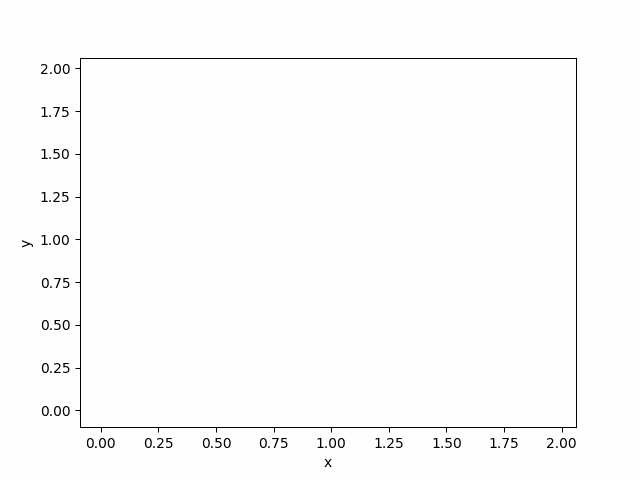

In [60]:
visA.show_gif()

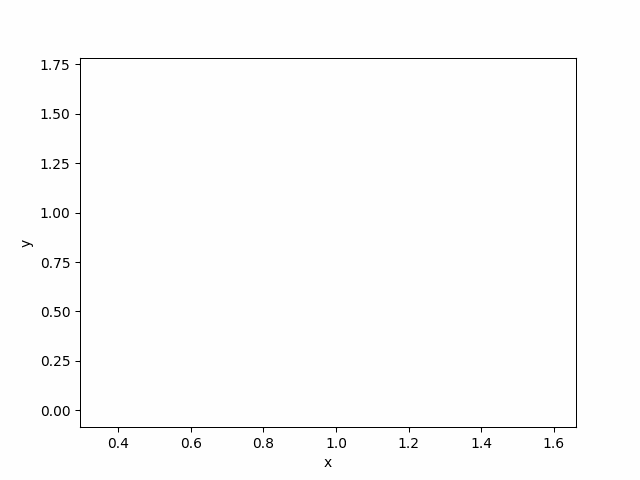

In [59]:
visB.show_gif(500)

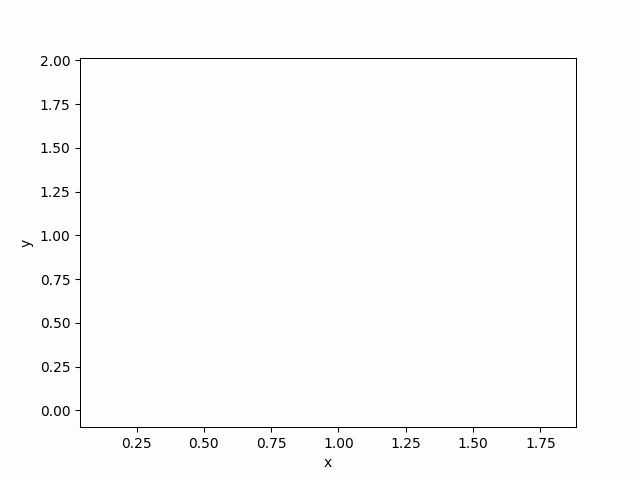

In [63]:
visC.show_gif(500)

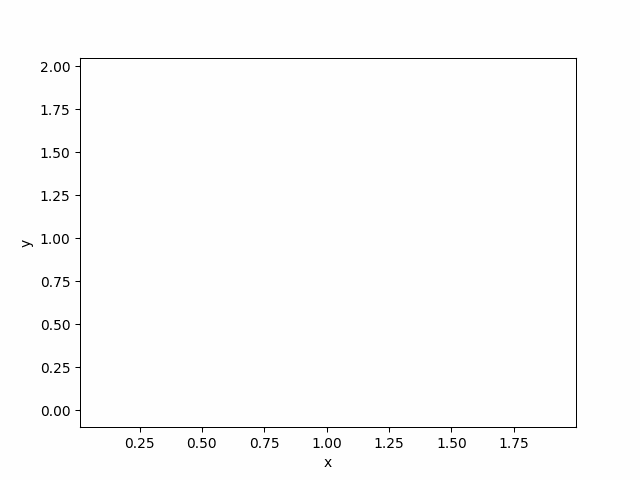

In [64]:
visD.show_gif(500)

In [4]:
import numpy as np
import seaborn as sns
from scipy.integrate import quad as integration
import matplotlib.pyplot as plt


def E(x):
    return 3 if x <= 1 else 5


def e(n, i, x):
    h = 2 / n
    return max(0, 1 - abs((x / h - i)))


def e_prim(n, i, x):
    h = 2 / n
    if x <= (i - 1) * h or x >= (i + 1) * h:
        return 0
    else:
        return 1 / h if x <= i * h else -1 / h


def calculate_integral(n, i, j):
    start = 2 * max(max(i, j) - 1, 0) / n
    end = 2 * min(min(i, j) + 1, n) / n
    return integration(lambda x: E(x) * e_prim(n, i, x) * e_prim(n, j, x), start, end)[0] if abs(j - i) <= 1 else 0


def fill(n):
    B, L = np.zeros((n, n)), np.zeros(n)
    L[0] = -30 * e(n, 0, 0)
    for i in range(n):
        for j in range(n):
            integral = calculate_integral(n, i, j)
            B[i, j] = -3 * e(n, i, 0) * e(n, j, 0) + integral
    return B, L


def show_plot(solution, n):
    sns.lineplot(x=np.linspace(0, 2, n + 1), y=solution)
    plt.title('Elastic deformation plot')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.grid(True)
    plt.savefig('elastic_deformation_plot.png')
    plt.show()


if __name__ == '__main__':
    user_input = int(input("Input n: "))
    B, L = fill(user_input)
    show_plot(np.concatenate((np.linalg.solve(B, L), [0])), user_input)

ModuleNotFoundError: No module named 'scipy'